<a href="https://colab.research.google.com/github/ameerracle/Breaking-Barriers-in-AI-for-Materials-and-Molecules/blob/main/ai_for_materials_part3_gflownets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atelier d'IA pour les Matériaux (Partie 3) : GFlowNets

## Installation de la bibliothèque GFlowNet

Notez que la procédure pour installer la bibliothèque dans un notebook Colab est légèrement différente de celle utilisée dans un terminal, qui serait plus simple et offrirait plus de contrôle à l'utilisateur. Veuillez vous référer aux instructions d'installation ici : [GFlowNet Installation](https://github.com/alexhernandezgarcia/gflownet#installation)

Cela prendra quelques minutes. Veuillez attendre la fin de l'installation.

In [ ]:
!rm -rf gflownet/
# Cloner le dépôt
!git clone https://github.com/alexhernandezgarcia/gflownet.git
# Changer de répertoire vers gflownet/
%cd gflownet/
!pwd
# Mettre à jour pip
!python -m pip install --upgrade pip
!python -m pip install numpy==1.26.4
# Installer torch 2.5.1
!python -m pip install torch==2.5.1 --index-url https://download.pytorch.org/whl/cpu
!python -m pip install torch-scatter -f https://data.pyg.org/whl/torch-2.5.1+cpu.html
# Installer la bibliothèque gflownet
!python -m pip install .[dev,materials]

## IMPORTANT

**Assurez-vous que la version de `numpy` est inférieure à `2.0.0`.**

1. Exécutez la cellule ci-dessous.
2. Si la version affichée est inférieure à `2.0.0`, par exemple `1.26.4`, alors tout est bon. Passez les étapes suivantes et continuez.
3. Sinon, redémarrez la session : Menu Runtime > Redémarrer la session.
4. Réexécutez la cellule d'installation ci-dessus.


In [2]:
import numpy as np
print(np.__version__)

1.26.4


## Entraîner un GFlowNet avec la tâche Scrabble

Cette étape prendra également quelques minutes. Vous pourrez voir une barre de progression pour l'entraînement.


In [ ]:
!python train.py env=scrabble proxy=scrabble


Working directory of this run: /content/gflownet/gflownet
Logging directory of this run: /content/gflownet/gflownet/logs/local/2025-03-28_19-19-12_236710

	Important: offline trajectories will NOT be sampled. In order to  sample offline trajectories, the train configuration of the buffer  should be provided.
	Important: test metrics will NOT be computed. In order to compute test metrics, the test configuration of the buffer should be provided.
/usr/local/lib/python3.11/dist-packages/torch/_compile.py:32: UserWarning: optimizer contains a parameter group with duplicate parameters; in future, this will cause an error; see github.com/pytorch/pytorch/issues/40967 for more information
  return disable_fn(*args, **kwargs)
Loss: 0.0290 | Mean rewards: 25.10 | JSD: -1.0000: 100% 5000/5000 [01:53<00:00, 43.97it/s]


### Échantillonner 1000 séquences Scrabble à partir du GFlowNet entraîné

**IMPORTANT**

Copiez le répertoire de journalisation affiché dans la cellule précédente, juste après "Logging directory of this run: ". Remplacez le répertoire dans la cellule ci-dessous, dans les deux lignes concernées. Assurez-vous de conserver le chemin entre guillemets doubles.


In [ ]:
rundir = "/content/gflownet/gflownet/logs/local/2025-03-28_19-19-12_236710"
!$rundir = "/content/gflownet/gflownet/logs/local/2025-03-28_19-19-12_236710"

/bin/bash: line 1: /content/gflownet/gflownet/logs/local/2025-03-28_19-19-12_236710: Is a directory


In [ ]:
!yes | python eval.py rundir=$rundir n_samples=1000

device: cpu
float_precision: 32
rundir: /content/gflownet/gflownet/logs/local/2025-03-28_19-19-12_236710
conditional_env_config_path: null
n_samples: 1000
sampling_batch_size: 100
output_dir: null
print_config: false
samples_only: false
randominit: false
user:
  logdir:
    root: ./logs
  data:
    root: ./data
    alanine_dipeptide: ~/gflownet/data/alanine_dipeptide_conformers_1.npy

Loading GFlowNet from the configuration in /content/gflownet/gflownet/logs/local/2025-03-28_19-19-12_236710...
/content/gflownet/gflownet/gflownet/utils/common.py:407: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits t

Importer pandas et seaborn pour les visualisations

In [ ]:
import pandas as pd
import seaborn as sns

Lisez l'ensemble de données des échantillons générés par le Scrabble-GFN.


In [ ]:
df = pd.read_csv(f"{rundir}/eval/samples/gfn_samples.csv")
df

,Unnamed: 0,readable,energies
0,0,C D L P K,14.0
1,1,E F Q X N X,32.0
2,2,C K P M F Z D,30.0
3,3,M Z C D G H D,26.0
4,4,W B K B Q F U,30.0
...,...,...,...
995,95,P Y G F X Y M,28.0
996,96,J X G S J O X,36.0
997,97,R H Z B A V S,24.0
998,98,Z M E O N J Q,34.0


Tracez la distribution des scores Scrabble à partir des 1000 échantillons générés.


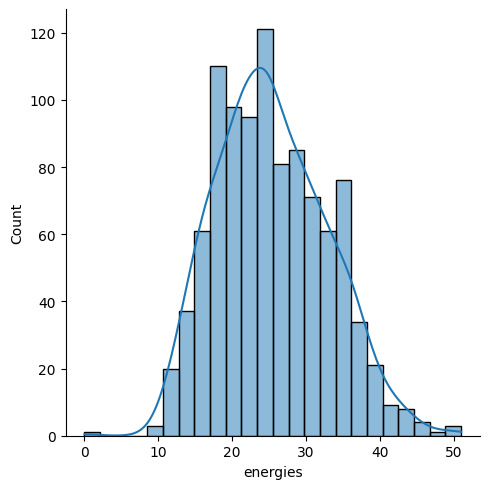

In [ ]:
sns.displot(data=df, x="energies", kde=True)

Cette distribution, à elle seule, ne permet pas d'évaluer si le GFlowNet a appris à échantillonner des séquences Scrabble avec des récompenses plus élevées que celles obtenues par un échantillonnage aléatoire.


In [ ]:
!yes | python eval.py rundir=$rundir n_samples=1000 randominit=True

device: cpu
float_precision: 32
rundir: /content/gflownet/gflownet/logs/local/2025-03-28_19-19-12_236710
conditional_env_config_path: null
n_samples: 1000
sampling_batch_size: 100
output_dir: null
print_config: false
samples_only: false
randominit: true
user:
  logdir:
    root: ./logs
  data:
    root: ./data
    alanine_dipeptide: ~/gflownet/data/alanine_dipeptide_conformers_1.npy

Loading GFlowNet from the configuration in /content/gflownet/gflownet/logs/local/2025-03-28_19-19-12_236710...
	Important: offline trajectories will NOT be sampled. In order to  sample offline trajectories, the train configuration of the buffer  should be provided.
	Important: test metrics will NOT be computed. In order to compute test metrics, the test configuration of the buffer should be provided.
/usr/local/lib/python3.11/dist-packages/torch/_compile.py:32: UserWarning: optimizer contains a parameter group with duplicate parameters; in future, this will cause an error; see github.com/pytorch/pytorch/is

Lisez l'ensemble de données des échantillons générés aléatoirement et tracez la distribution des scores.


In [ ]:
df_rnd = pd.read_csv(f"{rundir}/eval/samples/randominit_samples.csv")
df_rnd

,Unnamed: 0,readable,energies
0,0,NaN,0.0
1,1,NaN,0.0
2,2,NaN,0.0
3,3,G,2.0
4,4,G,2.0
...,...,...,...
995,95,D D N W A G M,15.0
996,96,Z Z W Q G C T,40.0
997,97,M V Y V N C H,23.0
998,98,W S U P V K V,22.0


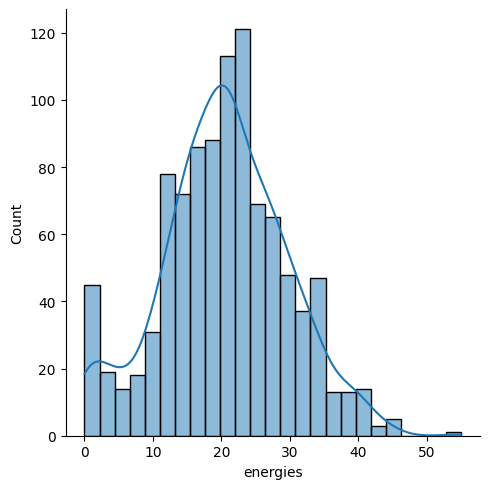

In [ ]:
sns.displot(data=df_rnd, x="energies", kde=True)

Pour comparer les distributions, fusionnons les deux DataFrames et traçons les distributions conjointement.

In [ ]:
df["source"] = "GFN"
df_rnd["source"] = "Random"
df = pd.concat([df, df_rnd])

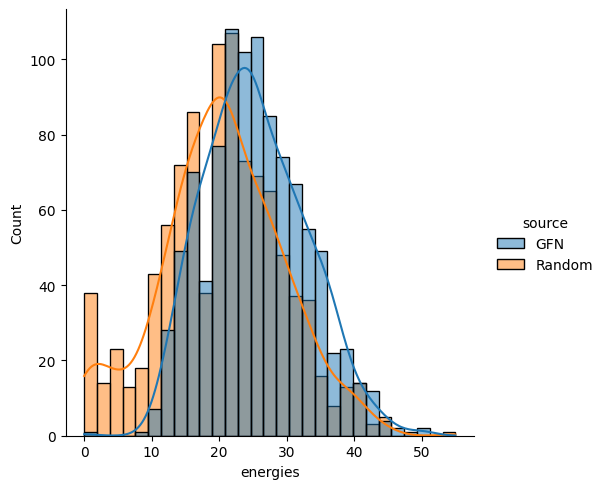

In [ ]:
sns.displot(data=df, x="energies", hue="source", kde=True)

Nous observons que, malgré un temps d'entraînement court, les GFlowNets ont commencé à apprendre à échantillonner des séquences Scrabble de lettres avec des récompenses plus élevées que lors de l'initialisation aléatoire.

## Crystal-GFN

À des fins d'illustration, nous allons entraîner un Crystal-GFN avec une récompense synthétique et un espace d'échantillonnage limité, restreint à :
- Les groupes spatiaux 225 et 229
- Les éléments Pd (46) et Pt (78)
- Une longueur cubique `a` allant de 2,0 à 4,0 angströms.

Cela limite les composés possibles à Pd2, Pt2, Pd4 et Pt4.


In [ ]:
from gflownet.utils.logger import Logger
from gflownet.envs.crystals.crystal import Crystal
from gflownet.buffer.base import BaseBuffer
from gflownet.evaluator.base import BaseEvaluator
from gflownet.gflownet import GFlowNetAgent
from gflownet.proxy.crystals.corners import CrystalCorners
from gflownet.policy.base import Policy

from functools import partial
from omegaconf import OmegaConf
from pathlib import Path

La cellule ci-dessous initialise tous les composants nécessaires pour entraîner un Crystal-GFN avec la configuration décrite ci-dessus.

In [ ]:
# Environnement
env = Crystal(
    do_composition_to_sg_constraints=False,
    do_sg_to_composition_constraints=True,
    do_sg_to_lp_constraints=True,
    do_sg_before_composition=True,
    composition_kwargs={
      "elements": [78, 46],
      "max_diff_elem": 1,
      "min_diff_elem": 1,
      "min_atoms": 2,
      "max_atoms": 4,
      "min_atom_i": 2,
      "max_atom_i": 4,
      "do_charge_check": False,
    },
    space_group_kwargs={
      "space_groups_subset": [229, 225],
      "policy_fmt": "onehot",
    },
    lattice_parameters_kwargs={
      "min_length": 2.0,
      "max_length": 4.0,
      "min_angle": 60.0,
      "max_angle": 140.0 ,
    },
)

# Proxy
proxy = CrystalCorners(
    config=[
       {
         "spacegroup": 225,
         "mu": 0.85,
         "sigma": 0.05,
       },
       {
         "spacegroup": 229,
         "mu": 0.65,
         "sigma": 0.05,
       },
       {
         "element": 46,
         "mu": 0.75,
         "sigma": 0.2,
       },
       {
         "element": 78,
         "mu": 0.75,
         "sigma": 0.1,
       },
    ],
    device="cpu",
    float_precision=32,
)

# Politique
policy_forward = Policy(
    env=env,
    config=OmegaConf.create({"type": "mlp", "n_layers": 2, "n_hid": 128}),
    device="cpu",
    float_precision=32,
)
policy_backward = Policy(
    env=env,
    config=OmegaConf.create({"type": "mlp", "n_layers": 2, "n_hid": 128}),
    device="cpu",
    float_precision=32,
)

# Tampon (Buffer)
buffer = BaseBuffer(
    env=env,
    proxy=proxy,
    test=OmegaConf.create({
      "type": "csv",
      "path": "./data/crystals/gull.csv",
    }),
    datadir=Path("./data/"),
)

# Journalisation (Logger)
logger = Logger(
   config=None,
   do=OmegaConf.create({"online": False, "times": False }),
   logdir=OmegaConf.create({"root": "./logs", "ckpts": "./ckpts", "overwrite": True}),
   project_name="aiformaterials",
   lightweight=False,
   debug=False,
)

# Évaluateur
evaluator = BaseEvaluator(
    first_it=False,
    period=-1,
    metrics="all",
    top_k=100,
    top_k_period=-1,
    n_trajs_logprobs=10,
    logprobs_batch_size=100,
    logprobs_bootstrap_size=10000,
    train_log_period=1,
    checkpoints_period=500,
)

# Agent GFlowNet
gflownet = GFlowNetAgent(
    env_maker=partial(env.copy),
    proxy=proxy,
    forward_policy=policy_forward,
    backward_policy=policy_backward,
    buffer=buffer,
    logger=logger,
    evaluator=evaluator,
    seed=0,
    optimizer=OmegaConf.create(
        {
            "loss": "trajectorybalance",
            "lr": 0.0001,
            "method": "adam",
            "n_train_steps": 1000,
            "batch_size": {
                "forward": 10,
                "backward_dataset": 0,
                "backward_replay": 0,
            },
            "z_dim": 16,
            "lr_z_mult": 10,
            "lr_decay_period": 1e9,
            "lr_decay_gamma": 0.5,
            "adam_beta1": 0.9,
            "adam_beta2": 0.999,
            "sgd_momentum": 0.9,
            "train_to_sample_ratio": 1,
            "clip_grad_norm": 0.0,
            "bootstrap_tau": 0.0,
            "ema_alpha": 0.5,
            "early_stopping": 0.0,
        }),
    mask_invalid_actions=True,
    temperature_logits=1.0,
    random_action_prob=0.0,
    device="cpu",
    float_precision=32,
)

	Important: offline trajectories will NOT be sampled. In order to  sample offline trajectories, the train configuration of the buffer  should be provided.

Constructing data set from CSV: ./data/crystals/gull.csv

The data set containts 156 samples
Test data
	Mean score: 1.1672104774831193
	Std score: 1.2612877233818416
	Min score: 0.0002174416440539062
	Max score: 3.703606128692627


### Explorer le proxy synthétique (fonction de récompenses)

In [ ]:
# Constantes
an2el = {46: "Pd", 78: "Pt"}
hue_order = ["Pd4", "Pd2", "Pt4", "Pt2"]

Lisez un ensemble de données d'échantillons et leurs scores pour tracer la distribution des scores du proxy synthétique.

In [ ]:
df_test = pd.read_csv("./data/crystals/gull.csv")
df_test

,Unnamed: 0,Formulae,Space Group,a,b,c,alpha,beta,gamma
0,1,Pt4,225,2.05,2.05,2.05,90.0,90.0,90.0
1,1,Pt4,225,2.10,2.10,2.10,90.0,90.0,90.0
2,1,Pt4,225,2.15,2.15,2.15,90.0,90.0,90.0
3,1,Pt4,225,2.20,2.20,2.20,90.0,90.0,90.0
4,1,Pt4,225,2.25,2.25,2.25,90.0,90.0,90.0
...,...,...,...,...,...,...,...,...,...
151,1,Pd2,229,3.75,3.75,3.75,90.0,90.0,90.0
152,1,Pd2,229,3.80,3.80,3.80,90.0,90.0,90.0
153,1,Pd2,229,3.85,3.85,3.85,90.0,90.0,90.0
154,1,Pd2,229,3.90,3.90,3.90,90.0,90.0,90.0


In [ ]:
data_test = buffer.test
print(data_test)

                                      samples_readable    scores  \
0    Stage 2; 225 | Fm-3m | cubic (8) | centrosymme...  2.654533   
1    Stage 2; 225 | Fm-3m | cubic (8) | centrosymme...  3.350698   
2    Stage 2; 225 | Fm-3m | cubic (8) | centrosymme...  3.703606   
3    Stage 2; 225 | Fm-3m | cubic (8) | centrosymme...  3.601320   
4    Stage 2; 225 | Fm-3m | cubic (8) | centrosymme...  3.107492   
..                                                 ...       ...   
151  Stage 2; 229 | Im-3m | cubic (8) | centrosymme...  2.458509   
152  Stage 2; 229 | Im-3m | cubic (8) | centrosymme...  1.794108   
153  Stage 2; 229 | Im-3m | cubic (8) | centrosymme...  1.184542   
154  Stage 2; 229 | Im-3m | cubic (8) | centrosymme...  0.735279   
155  Stage 2; 229 | Im-3m | cubic (8) | centrosymme...  0.453777   

                                               samples   rewards  
0    [2, [8, 2, 225], {78: 4}, [0.02499999999999991...  2.654533  
1    [2, [8, 2, 225], {78: 4}, [0.050000000000000

Create data frame for plotting purposes

In [ ]:
samples_tt = data_test["samples"]
scores_tt = data_test["scores"]

df_tt = pd.DataFrame(columns=["Groupe spatial", "Élément", "Composition", "a", "Score"])

for idx, (sample, score) in enumerate(zip(samples_tt, scores_tt)):
    df_tt.loc[idx] = pd.Series(
        {
            "Groupe spatial": sample[1][2],
            "ElemeÉlémentnt": list(sample[2].keys())[0],
            "Composition": f"{an2el[list(sample[2].keys())[0]]}{list(sample[2].values())[0]}",
            "a": 2.0 + sample[3][0] * (4.0 - 2.0),
            "Score": score,
        })

Tracer les distributions des scores

<Axes: xlabel='a', ylabel='Score'>

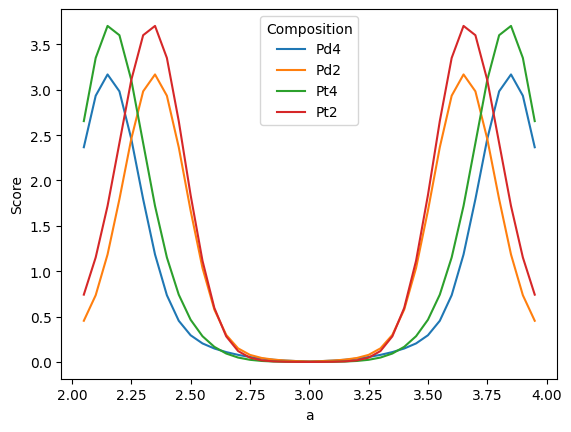

In [ ]:
sns.lineplot(data=df_tt, x="a", y="Score", hue="Composition", hue_order=hue_order)

### Explorer l’Environnement Crystal

`env.state` contient l’état actuel d’un environnement Crystal.

L’état d’un environnement Crystal est une liste avec quatre éléments :
- L’étape, représentant le groupe spatial (0), la composition (1) et les paramètres de réseau (2).
- L’état du groupe spatial, qui est une liste de trois indices, faisant référence au système cristallin, à la symétrie ponctuelle et au groupe spatial.
- L’état de la composition, qui est un dictionnaire de `élément : nombre d’atomes`, où l’élément est le numéro atomique.
- L’état des paramètres de réseau, qui est une liste de six éléments : a, b, c, α, β, γ.

Lors de l’initialisation, l’état est l’état source.

In [ ]:
print(env.state)

[0, [0, 0, 0], {}, [-1, -1, -1, -1, -1, -1]]


Nous pouvons effectuer des étapes aléatoires dans l’environnement. Vous pouvez exécuter cette cellule plusieurs fois pour effectuer plusieurs étapes.

In [ ]:
new_state, action, is_valid = env.step_random()
print("Nouvel état : ")
print(new_state)
print("Action effectuée :")
print(action)
if env.done:
  print("La trajectoire est terminée - l'état est un cristal finalisé")

New state: 
[2, [8, 2, 225], {78: 4}, [0.7178686559200287, 0.7178686559200287, 0.7178686559200287, 0.375, 0.375, 0.375]]
Action performed
(2, inf, inf, inf, inf, inf, inf, inf)
The trajectory is done - the state is a terminated crystal


Vous pouvez réinitialiser un environnement à son état source avec `env.reset()`.

In [ ]:
env.reset()


### Entraîner un Crystal-GFN pendant 1000 étapes

Nous entraînerons le Crystal-GFN pendant seulement 1000 étapes, ce qui prendra environ une minute. Ce court entraînement ne permettra pas au modèle de correspondre parfaitement à la distribution des récompenses, mais il devrait déjà montrer une amélioration visible.


In [ ]:
gflownet.train()

Loss: 1019.1100 | Mean rewards: 1.40 | JSD: -1.0000: 100%|██████████| 1000/1000 [00:56<00:00, 17.71it/s]


### Évaluer le Crystal-GFN Entraîné

Échantillonner un lot de 10 000 cristaux générés et calculer leurs scores. Cela prendra quelques secondes.


In [ ]:
gfn_samples_batch, _ = gflownet.sample_batch(n_forward=10000, train=False)
samples_gfn = gfn_samples_batch.get_terminating_states()
scores_gfn = gflownet.proxy(env.states2proxy(samples_gfn))

Construire un DataFrame à des fins de visualisation.


In [ ]:
df_gfn = pd.DataFrame(columns=["Groupe spatial", "Élément", "Composition", "a", "Score"])

for idx, (sample, score) in enumerate(zip(samples_gfn, scores_gfn)):
    df_gfn.loc[idx] = pd.Series(
        {
            "Groupe spatial": sample[1][2],
            "Élément": list(sample[2].keys())[0],
            "Composition": f"{an2el[list(sample[2].keys())[0]]}{list(sample[2].values())[0]}",
            "a": 2.0 + sample[3][0] * (4.0 - 2.0),
            "Score": score,
        })

Tracer l’histogramme et les densités KDE des échantillons générés

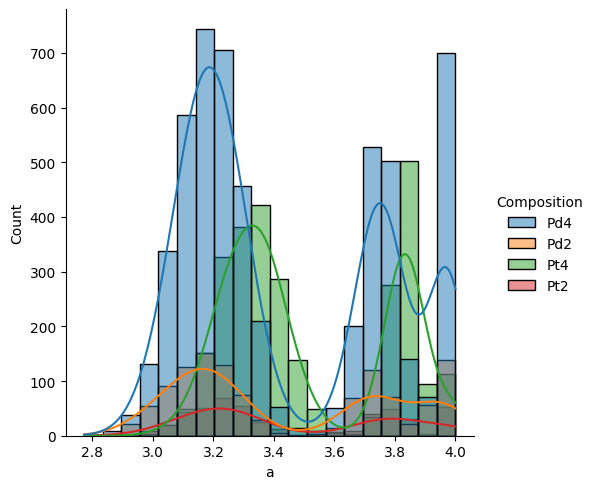

In [ ]:
sns.displot(data=df_gfn, x="a", hue="Composition", kde=True, bins=20, hue_order=hue_order)

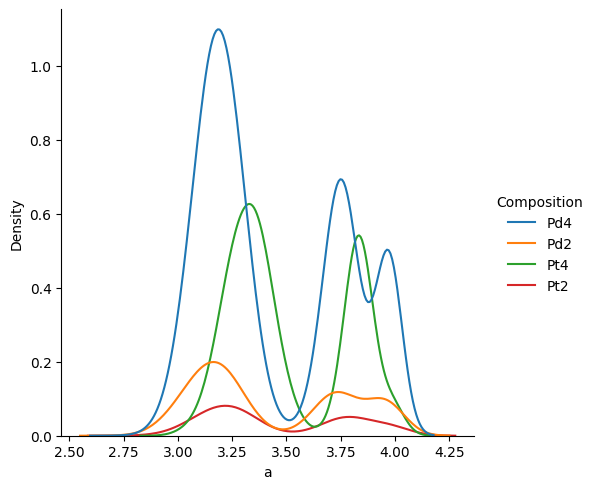

In [ ]:
sns.displot(data=df_gfn, x="a", hue="Composition", kind="kde", hue_order=hue_order)

Nous observons que les densités des échantillons générés sont loin de correspondre à la vraie fonction de récompense, mais nous voyons qu’elles commencent à s’en rapprocher, malgré un entraînement de seulement 1000 itérations en quelques minutes.